In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import klib

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'C:\Users\Vishesh Kushwaha\Downloads\train_dataset.csv')

In [5]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


# Handle Imbalance DataSet

In [6]:
Stage_count = pd.Series.to_dict(df.Stage.value_counts())
for k in Stage_count:
  print('% of ',int(k),' stage is',Stage_count[k]/len(df.Stage)*100)

% of  4  stage is 51.55882352941177
% of  2  stage is 22.16176470588235
% of  3  stage is 19.441176470588236
% of  1  stage is 6.838235294117648


In [7]:
df['Stage']=df['Stage'].astype(str)

<AxesSubplot:xlabel='Stage', ylabel='count'>

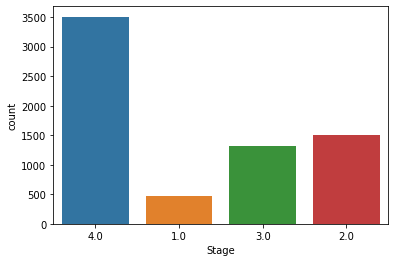

In [8]:
sns.countplot(df['Stage'])

GridSpec(6, 8)

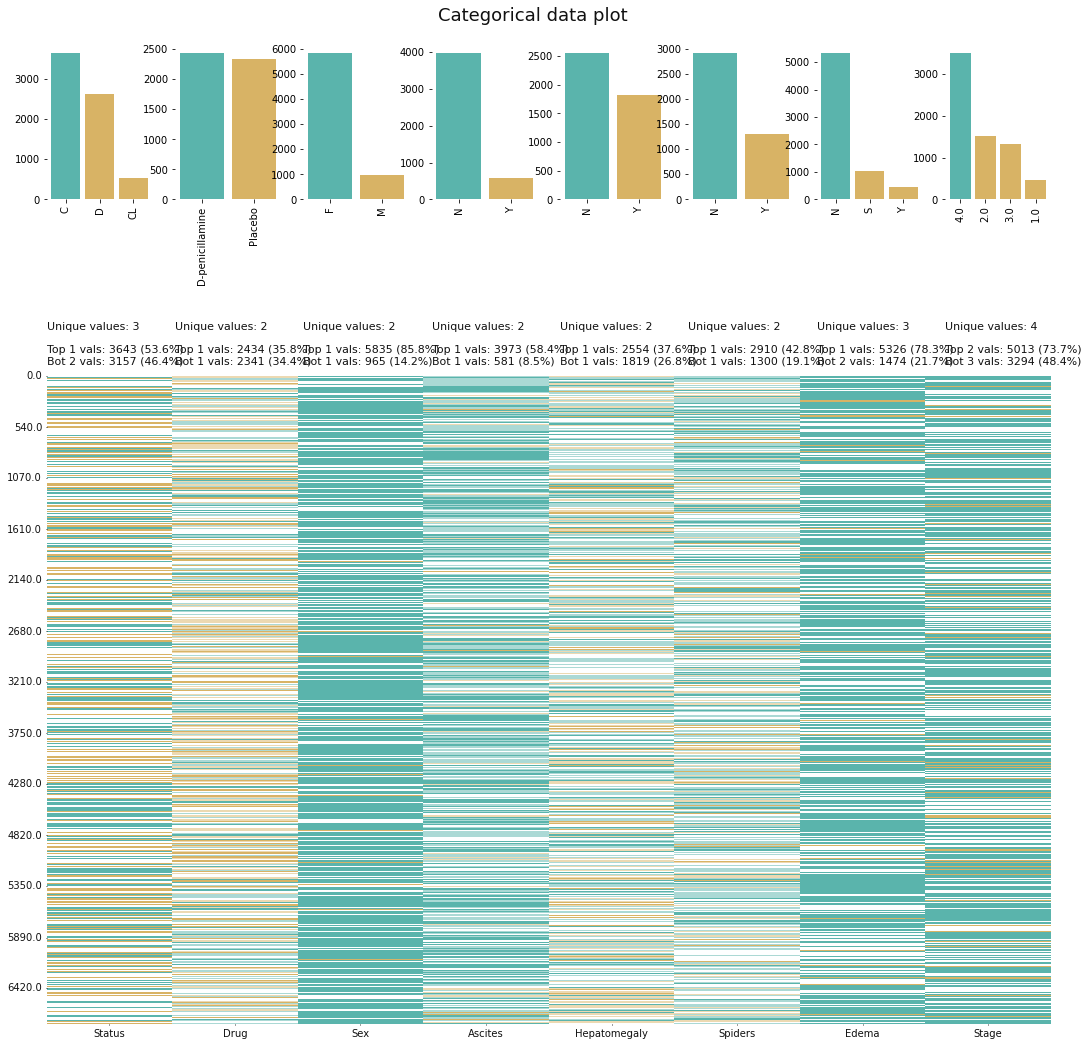

In [9]:
klib.cat_plot(df)

<AxesSubplot:xlabel='Prothrombin', ylabel='Density'>

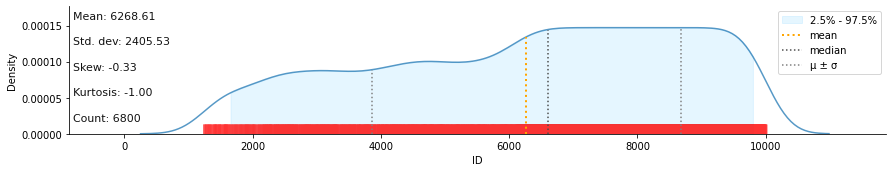

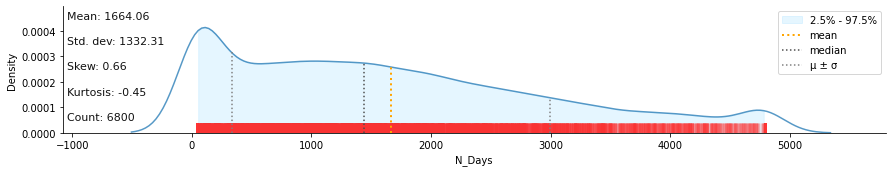

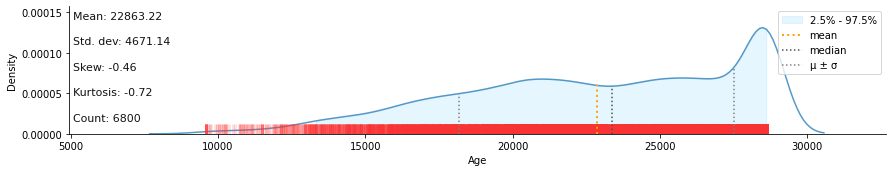

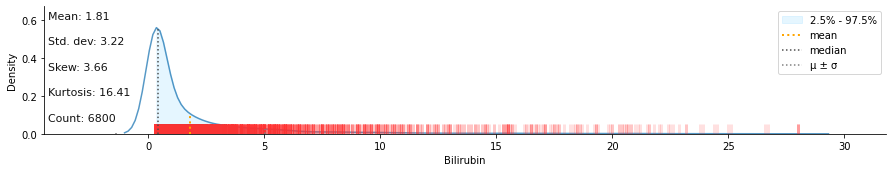

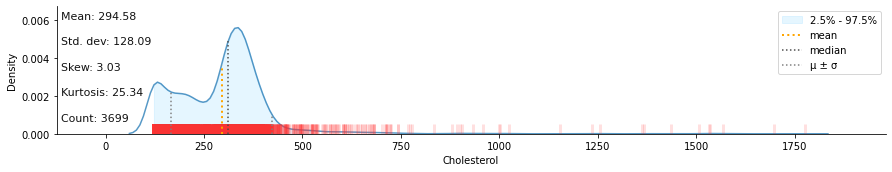

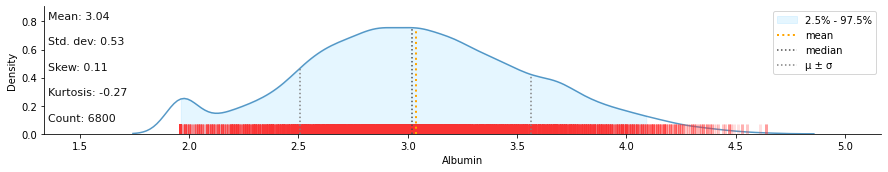

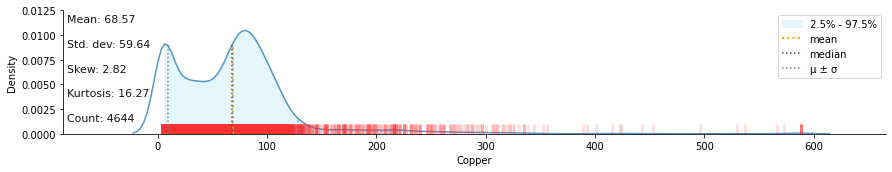

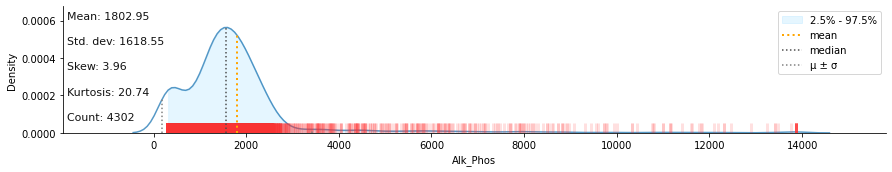

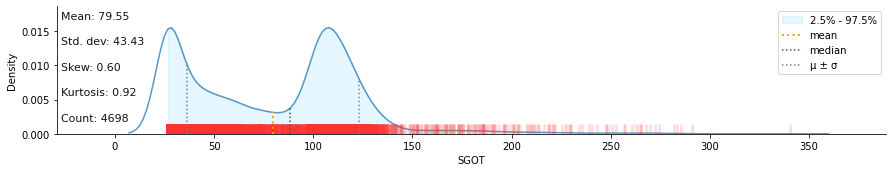

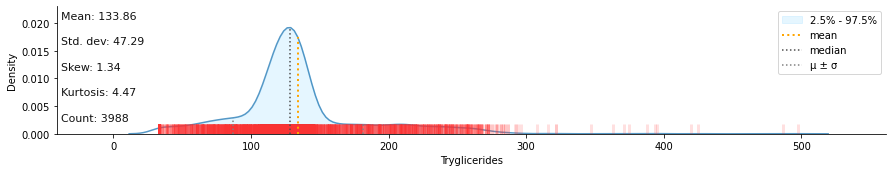

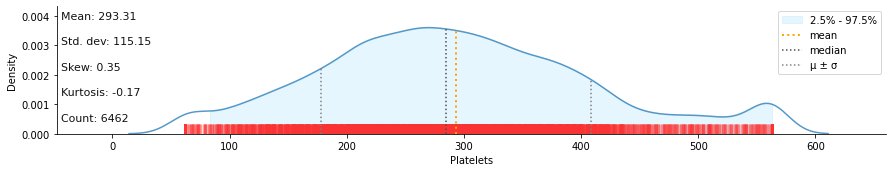

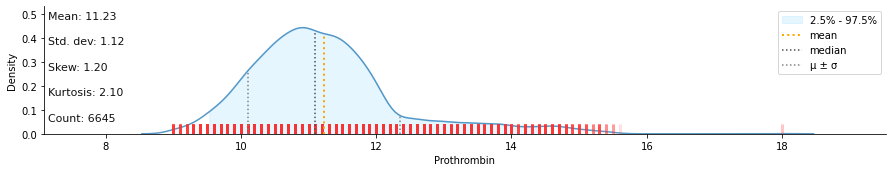

In [10]:
klib.dist_plot(df)

GridSpec(6, 6)

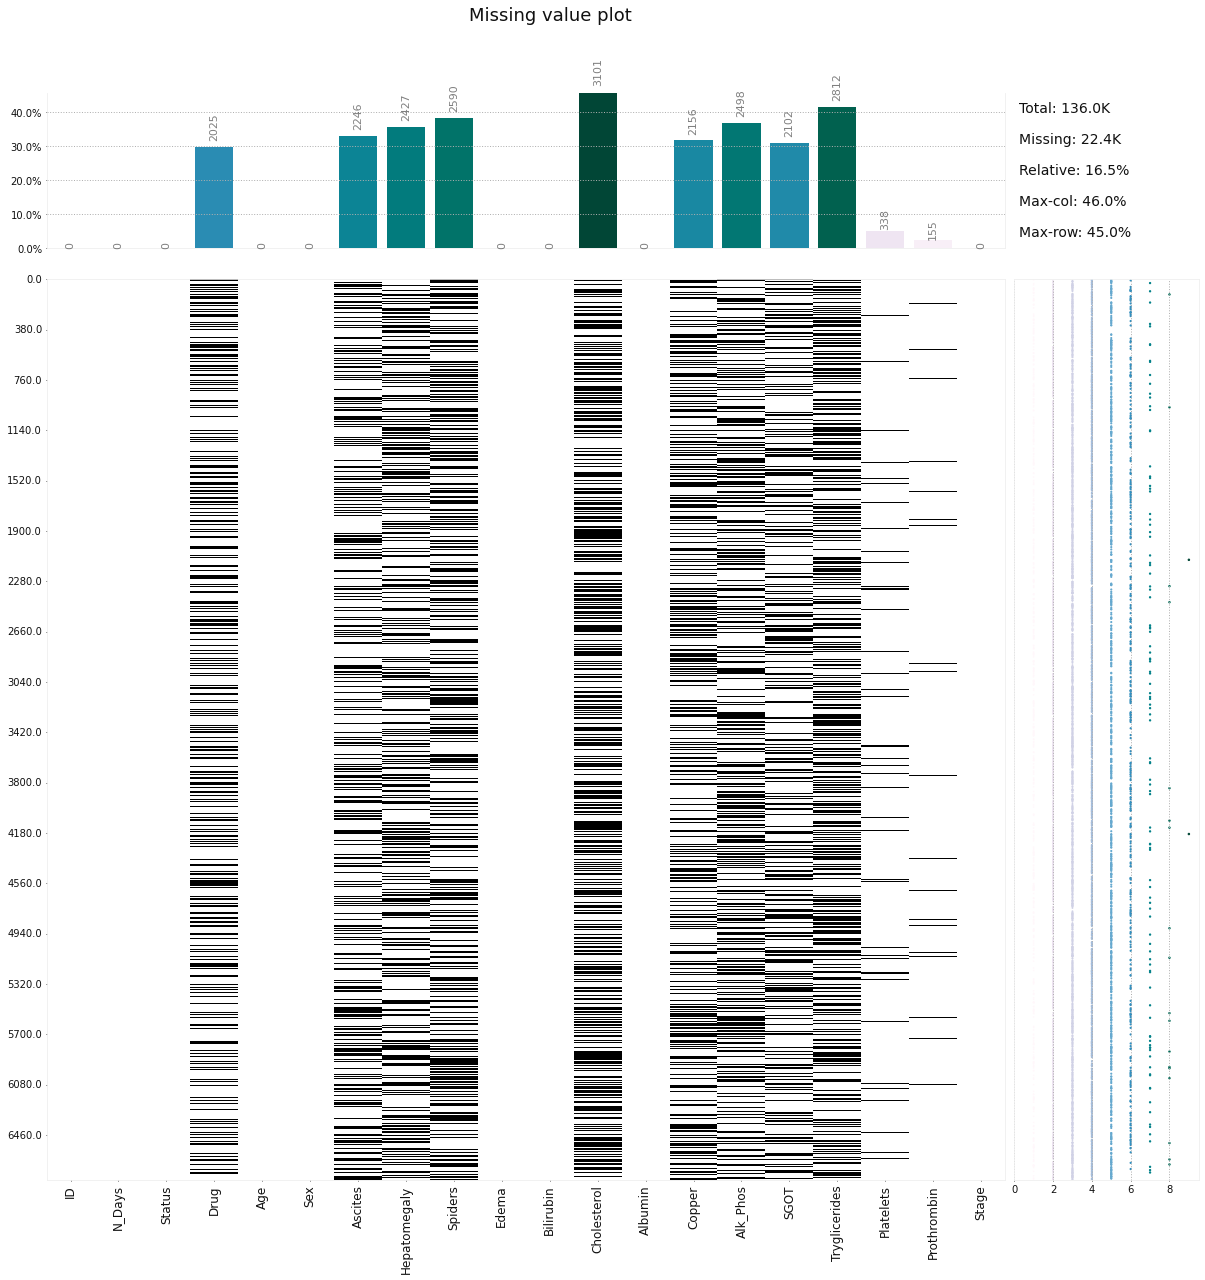

In [11]:
klib.missingval_plot(df)

# HANDLE MISSING FEATURE

In [12]:
def check_missing(df,feature):
    missing_percent=df[feature].isna().sum()/len(df[feature])
    return missing_percent


In [17]:
miss_feats=dict()
ind = 1
for col in df.columns:
    res=check_missing(df,col)
    if(res > 0.0):
        miss_feats[col] = res*100
    ind+=1


data = {
    'Features' : list(miss_feats.keys())
    ,
    
     'Miss_Percent' :   list(miss_feats.values())
}

In [20]:
pd.DataFrame(data).sort_values(by='Miss_Percent',ascending=False).head(11)

,Features,Miss_Percent
4,Cholesterol,45.602941
8,Tryglicerides,41.352941
3,Spiders,38.088235
6,Alk_Phos,36.735294
2,Hepatomegaly,35.691176
1,Ascites,33.029412
5,Copper,31.705882
7,SGOT,30.911765
0,Drug,29.779412
9,Platelets,4.970588


There seems to be a lot of features having the missing values.Out of 19 Features , 9 seems to substantial missing values (more than 25%).
So filling of the missing values will be based in the distribution and data type of the  features. 

<AxesSubplot:>

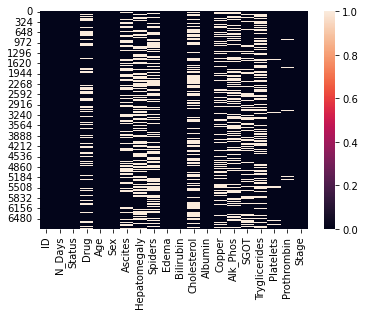

In [21]:
sns.heatmap(df.isna())

In [22]:
def detect_outlier(df,feature):
  IQR=df[feature].quantile(0.75)-df[feature].quantile(0.25)
  lower=df[feature].quantile(0.25)-(IQR*1.5)
  upper=df[feature].quantile(0.75)+(IQR*1.5)

  count=0
  for i in df[feature]:
    if(i<=lower or i>=upper):
      count+=1

  return count  

In [23]:
variable=[x for x in df.columns if df[x].dtype!='object' and not x in ['ID','Stage']]
for att in variable:
  res=detect_outlier(df,att)
  if(res > 0):
    print('Count of outliers in ',att,' is:',str(res))
    print('% of outliers in ',att,' is: ',round((res/len(df[att])*100),2),'%')
    print('\n')
    

Count of outliers in  Bilirubin  is: 839
% of outliers in  Bilirubin  is:  12.34 %


Count of outliers in  Cholesterol  is: 73
% of outliers in  Cholesterol  is:  1.07 %


Count of outliers in  Albumin  is: 19
% of outliers in  Albumin  is:  0.28 %


Count of outliers in  Copper  is: 180
% of outliers in  Copper  is:  2.65 %


Count of outliers in  Alk_Phos  is: 285
% of outliers in  Alk_Phos  is:  4.19 %


Count of outliers in  SGOT  is: 32
% of outliers in  SGOT  is:  0.47 %


Count of outliers in  Tryglicerides  is: 826
% of outliers in  Tryglicerides  is:  12.15 %


Count of outliers in  Prothrombin  is: 393
% of outliers in  Prothrombin  is:  5.78 %




## Finding from EDA performed



*1)*    **So until now we have found that the MultiClass Dataset is highly Imbalanced for Stage 4.**

*2)*     **Out of the 19 features, 11 of them seems to be having missing values.Out of which 9 have missing percent more than 25%**

*3)*      **Cholesterol and Tryglicerides seems to be having high miss rates (more than 40%), so the best technique will be to dropping**

*4)*      **Out of the Numerical features {Cholesterol,Copper & SGOT} seems to have Saddle points over a range of values.Rest seems to be normal , but      skewed**

*5)*      **Some of the Numerical Features have Outliers, with maximum percent being 12.34%.If the missing values are handled carefully,Then ouliers can either be dropped or can be replaced using 'End of distribution' if it does not distort the Distribution of data.**
